In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline

from numpy.linalg import inv,pinv
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time

In [2]:
import tensorflow as tf

In [3]:
def logit(z):
    return 1/(1+np.exp(-z))

In [4]:
def tanh(z):
    return 2*logit(2*z) - 1

In [5]:

def lrelu(z,alpha=0.1):
    return np.maximum(alpha*z,z)

In [6]:
def elu(z,alpha=1):
    return np.where(z<0,alpha*(np.exp(z)-1),z)

In [7]:
from sklearn.datasets import load_iris


data = load_iris()
x = data.data[:,:]
y = (data.target == 0).astype(np.int)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
mnist0 = fetch_mldata('MNIST original')
mnist0

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [9]:
x = mnist0.data
y = (mnist0.target == 4).astype(np.int)
#y = mnist0.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [10]:
x_train.shape,y_train

((49000, 784), array([0, 0, 0, ..., 0, 0, 0]))

In [10]:
x = np.linspace(-10,10,5000).reshape(5000,-1)
y0 = np.where(x==0,1,np.sin(x)/x)
bias = np.random.uniform(-0.2,0.2,5000).reshape(5000,1)
y = y0+np.array(bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [182]:
y.shape

(5000, 1)

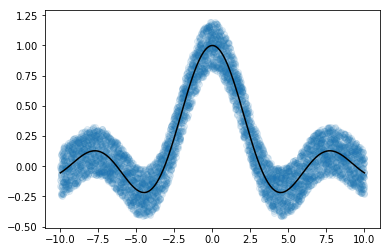

In [184]:
plt.scatter(x,y,alpha=0.1)
plt.plot(x,y0,'k')
plt.show()

In [894]:
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [895]:
x.shape

(506, 13)

In [848]:
from sklearn.datasets import load_diabetes
dia = load_diabetes()
x,y = dia.data,dia.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [849]:
x.shape

(442, 10)

In [24]:
a,b = x_train.shape

def relm(x,y,c=1):     
    #h = logit(x)
    h = x
    if a > b:
        beta = inv(c*np.eye((h.T.dot(h)).shape[0]) + h.T.dot(h)).dot(h.T.dot(y))
    else:
        beta =h.T.dot(inv(c*np.eye((h.dot(h.T)).shape[0]) + h.dot(h.T))).dot(y)
    z = x.dot(beta)
    return z,beta

    


In [11]:
t0 = np.arange(1000).reshape(200,5)
z,bo = relm(t0,t0)

In [12]:
z

array([[  3.98010142e-03,   1.00199304e+00,   2.00000596e+00,
          2.99801888e+00,   3.99603179e+00],
       [  5.00395014e+00,   6.00197810e+00,   7.00000592e+00,
          7.99803381e+00,   8.99606164e+00],
       [  1.00039202e+01,   1.10019632e+01,   1.20000059e+01,
          1.29980487e+01,   1.39960915e+01],
       [  1.50038902e+01,   1.60019482e+01,   1.70000059e+01,
          1.79980637e+01,   1.89961213e+01],
       [  2.00038602e+01,   2.10019333e+01,   2.20000058e+01,
          2.29980786e+01,   2.39961512e+01],
       [  2.50038303e+01,   2.60019183e+01,   2.70000058e+01,
          2.79980935e+01,   2.89961810e+01],
       [  3.00038003e+01,   3.10019034e+01,   3.20000058e+01,
          3.29981085e+01,   3.39962109e+01],
       [  3.50037704e+01,   3.60018884e+01,   3.70000057e+01,
          3.79981234e+01,   3.89962407e+01],
       [  4.00037404e+01,   4.10018735e+01,   4.20000057e+01,
          4.29981383e+01,   4.39962706e+01],
       [  4.50037104e+01,   4.6001858

In [26]:
# elm algorithm

# fit
for _ in range(10):
    tic = time.time()
    x = np.array(x_train)
    #alpha = np.random.randn(b,b-300)
    #alpha = np.random.uniform(-1,1,size=(b,b+1))
    alpha = np.random.randn(b,b+2)
    h = np.dot(x,alpha)
    h = lrelu(h,alpha=0.1)
    #h = elu(h)
    z,beta = relm(h,y_train,c=0.1)

    # predict
    x = x_test
    h1 = np.dot(x,alpha)
    h1 = lrelu(h1,alpha=0.1)
    #h1 = elu(h1)

    z = h1.dot(beta)

    toc = time.time()
    ti = toc - tic
    mse = mean_squared_error(y_test,z)
    final_rmse = np.sqrt(mse)
    print(final_rmse,'time',ti)
    #y_pred = np.where(z<0.4,0,1)
    #print('accuracy',accuracy_score(y_test,y_pred),'time',ti)

115921.369143 time 0.013000726699829102
112819.035584 time 0.009000301361083984
108798.882475 time 0.010000467300415039
106949.745942 time 0.01000070571899414
130922.690735 time 0.014000654220581055
116287.612181 time 0.016000986099243164
109984.164358 time 0.019001007080078125
113704.147905 time 0.014000654220581055
117935.96588 time 0.01300048828125
110949.189598 time 0.01500082015991211


In [7]:
#y_pred = np.where(z<0.5,0,np.where(z<1.5,1,np.where(z<2.5,2,np.where(z<3.5,3,np.where(z<4.5,4,np.where(z<5.5,5,np.where(z<6.5,6,np.where(z<7.5,7,np.where(z<8.5,8,9)))))))))
y_pred = np.where(z<0.4,0,1)
accuracy_score(y_test,y_pred)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [269]:
mse = mean_squared_error(y_test,z)
final_rmse = np.sqrt(mse)
final_rmse

5.0717186095443427

In [877]:
for _ in range(10):
    x= x_train
    m =1
    #alpha0 = np.random.uniform(-1,1,size=(b,b+3))
    #alpha1 = np.random.uniform(-1,1,size=(b,b+2)) 
    #alpha2 = np.random.uniform(-1,1,size=(b,b+1)) 
    #alpha3 = np.random.uniform(-1,1,size=(b,b-1))
    #alpha4 = np.random.uniform(-1,1,size=(b,b-2))
    alpha0 = np.random.randn(b,b+3)
    alpha1 = np.random.randn(b,b+2)
    alpha2 = np.random.randn(b,b+1)
    alpha3 = np.random.randn(b,b-1)
    alpha4 = np.random.randn(b,b)

    beta0,beta1,beta2,beta3,beta4 = [],[],[],[],[]
    beta_last = []
    #autoencoder
    for _ in range(m):
        h0,h1,h2,h3,h4 = np.dot(x,alpha0),np.dot(x,alpha1),np.dot(x,alpha2),np.dot(x,alpha3),np.dot(x,alpha4)
        h0,h1,h2,h3,h4 = lrelu(h0,alpha=0.01),lrelu(h1,alpha=0.01),lrelu(h2,alpha=0.01),lrelu(h3,alpha=0.01),lrelu(h4,alpha=0.01)
        z0 ,beta_0 = relm(h0,x,c=0.01)
        beta0.append(beta_0)
        z1 ,beta_1 = relm(h1,x,c=0.01)
        beta1.append(beta_1)
        z2 ,beta_2 = relm(h2,x,c=0.01)
        beta2.append(beta_2)
        z3 ,beta_3 = relm(h3,x,c=0.01)
        beta3.append(beta_3)
        z4 ,beta_4 = relm(h4,x,c=0.01)
        beta4.append(beta_4)
        x = (z0+z1+z2+z3+z4)/5
    #fit

    h_last = lrelu(x,alpha=0.01)
    z_last ,beta= relm(h_last,y_train,c=0.01)
    beta_last.append(beta)

    #z3_last ,beta= relm(h3_last,y_train,c=0.5)
    #beta3.append(beta)
    #z4_last ,beta= relm(h4_last,y_train,c=0.5)
    #beta4.append(beta)
    #y_pred = (z0_last+z1_last+z2_last+z3_last+z4_last)/5

    #predict
    x = x_test

    h0,h1,h2,h3,h4 = np.dot(x,alpha0),np.dot(x,alpha1),np.dot(x,alpha2),np.dot(x,alpha3),np.dot(x,alpha4)
    h0,h1,h2,h3,h4 = lrelu(h0,alpha=0.01),lrelu(h1,alpha=0.01),lrelu(h2,alpha=0.01),lrelu(h3,alpha=0.01),lrelu(h4,alpha=0.01)
    z0 = h0.dot(beta0[m-1]) 
    z1 = h1.dot(beta1[m-1]) 
    z2 = h2.dot(beta2[m-1])
    z3 = h3.dot(beta3[m-1])
    z4 = h4.dot(beta4[m-1])
    x = (z0+z1+z2+z3+z4)/5

    h_p = lrelu(x,alpha=0.01)
    y_pred = h_p.dot(beta_last[0])
    
    mse = mean_squared_error(y_test,y_pred)
    final_rmse = np.sqrt(mse)
    print(final_rmse)

104856.6632
100492.103701
105506.416562
106092.565619
111023.018024
105814.933405
107415.300107
115308.882986
105535.850906
104125.169021


In [597]:
y_pred.shape

(89,)

In [333]:
mse = mean_squared_error(y_test,y_pred)
final_rmse = np.sqrt(mse)
final_rmse

6.5103530445376796

In [31]:

def save_fig(fig_id, tight_layout=True):
    path = os.path.join('F:/ctex文件/', fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    foo_fig = plt.gcf()
    foo_fig.savefig(path, format='png', dpi=300)
    plt.show()
    
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 154)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)


Saving figure mnist_pca_compression_plot


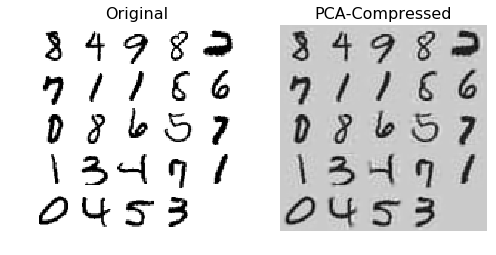

In [32]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("PCA-Compressed", fontsize=16)

save_fig("mnist_pca_compression_plot")

In [43]:
x= x_train
m =2
alpha0 = [np.random.randn(b,b-300) for _ in range(2)]
alpha1 = [np.random.randn(b,b-500) for _ in range(2)]
alpha2 = [np.random.randn(b,b-400) for _ in range(2)]
alpha3 = [np.random.randn(b,b-500) for _ in range(2)]
alpha4 = [np.random.randn(b,b-600) for _ in range(2)]

beta0,beta1,beta2,beta3,beta4 = [],[],[],[],[]

#autoencoder
for _ in range(m):
    h0,h1,h2,h3,h4 = np.dot(x,alpha0[0]),np.dot(x,alpha1[0]),np.dot(x,alpha2[0]),np.dot(x,alpha3[0]),np.dot(x,alpha4[0])
    h0,h1,h2,h3,h4 = lrelu(h0,alpha=1),lrelu(h1,alpha=1),lrelu(h2,alpha=1),lrelu(h3,alpha=1),lrelu(h4,alpha=1)
    #h0,h1,h2 = tanh(h0),tanh(h1),tanh(h2)#,tanh(h3),tanh(h4)
    #h0,h1,h2 = lrelu(h0),lrelu(h1),lrelu(h2)
    z0 ,beta_0 = relm(h0,x,c=0.1)
    beta0.append(beta_0)
    z1 ,beta_1 = relm(h1,x,c=0.1)
    beta1.append(beta_1)
    z2 ,beta_2 = relm(h2,x,c=0.1)
    beta2.append(beta_2)
    z3 ,beta_3 = relm(h3,x,c=0.1)
    beta3.append(beta_3)
    z4 ,beta_4 = relm(h4,x,c=0.1)
    beta4.append(beta_4)
    x = (z0+z1+z2+z3+z4)/5
    #x = (z0 + z1 + z2)/3



Saving figure mnist_re_elm_compression_plot


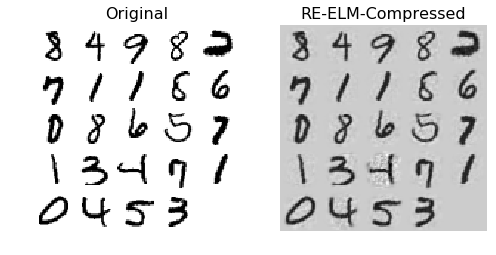

In [44]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x[::2100])
plt.title("RE-ELM-Compressed", fontsize=16)

save_fig("mnist_re_elm_compression_plot")

In [29]:
#recurrent h -elm
#for _ in range(10):
for m in [1,2,3,4,5,6,7,8,9]:
    tic = time.time()
    x= x_train
    #m =3
    alpha0 = [np.random.randn(b,b+1) for _ in range(2)]
    alpha1 = [np.random.randn(b,b+2) for _ in range(2)]
    alpha2 = [np.random.randn(b,b+3) for _ in range(2)]
    #alpha3 = [np.random.randn(b,b-500) for _ in range(2)]
    #alpha4 = [np.random.randn(b,b-600) for _ in range(2)]

    beta0,beta1,beta2,beta3,beta4 = [],[],[],[],[]

    #autoencoder
    for _ in range(m):
        h0,h1,h2 = np.dot(x,alpha0[0]),np.dot(x,alpha1[0]),np.dot(x,alpha2[0])#,np.dot(x,alpha3[0]),np.dot(x,alpha4[0])
        #h0,h1,h2,h3,h4 = lrelu(h0,alpha=1),lrelu(h1,alpha=1),lrelu(h2,alpha=1),lrelu(h3,alpha=1),lrelu(h4,alpha=1)
        h0,h1,h2 = tanh(h0),tanh(h1),tanh(h2)#,tanh(h3),tanh(h4)
        #h0,h1,h2 = lrelu(h0),lrelu(h1),lrelu(h2)
        z0 ,beta_0 = relm(h0,x,c=0.1)
        beta0.append(beta_0)
        z1 ,beta_1 = relm(h1,x,c=0.1)
        beta1.append(beta_1)
        z2 ,beta_2 = relm(h2,x,c=0.1)
        beta2.append(beta_2)
        #z3 ,beta_3 = relm(h3,x,c=0.1)
        #beta3.append(beta_3)
        #z4 ,beta_4 = relm(h4,x,c=0.1)
        #beta4.append(beta_4)
        #x = (z0+z1+z2+z3+z4)/5
        x = (z0 + z1 + z2)/3
    #fit
    h0_last,h1_last,h2_last = np.dot(x,alpha0[-1]),np.dot(x,alpha1[-1]),np.dot(x,alpha2[-1])#,np.dot(x,alpha3[-1]),np.dot(x,alpha4[-1])
    #h0_last,h1_last,h2_last,h3_last,h4_last = lrelu(h0_last,alpha=1),lrelu(h1_last,alpha=1),lrelu(h2_last,alpha=1),lrelu(h3_last,alpha=1),lrelu(h4_last,alpha=1)
    h0_last,h1_last,h2_last = lrelu(h0_last),lrelu(h1_last),lrelu(h2_last)#,tanh(h3_last),tanh(h4_last)
    z0_last ,beta= relm(h0_last,y_train,c=0.1)
    beta0.append(beta)
    z1_last ,beta= relm(h1_last,y_train,c=0.1)
    beta1.append(beta)   
    z2_last ,beta= relm(h2_last,y_train,c=0.1)
    beta2.append(beta)
    #z3_last ,beta= relm(h3_last,y_train,c=0.1)
    #beta3.append(beta)
    #z4_last ,beta= relm(h4_last,y_train,c=0.1)
    #beta4.append(beta)
    #y_pred = (z0_last+z1_last+z2_last+z3_last+z4_last)/5
    
    #predict
    x = x_test

    h0,h1,h2 = np.dot(x,alpha0[0]),np.dot(x,alpha1[0]),np.dot(x,alpha2[0])#,np.dot(x,alpha3[0]),np.dot(x,alpha4[0])
    #h0,h1,h2 = lrelu(h0),lrelu(h1),lrelu(h2)
    h0,h1,h2 = tanh(h0),tanh(h1),tanh(h2)#,tanh(h3),tanh(h4)
    #h0,h1,h2,h3,h4 = lrelu(h0),lrelu(h1),lrelu(h2),lrelu(h3),lrelu(h4)
    #h0,h1,h2,h3,h4 = lrelu(h0,alpha=1),lrelu(h1,alpha=1),lrelu(h2,alpha=1),lrelu(h3,alpha1=1),lrelu(h4,alpha=1)
    z0 = h0.dot(beta0[m-1]) 
    z1 = h1.dot(beta1[m-1]) 
    z2 = h2.dot(beta2[m-1])
    #z3 = h3.dot(beta3[m-1])
    #z4 = h4.dot(beta4[m-1])
    #x = (z0+z1+z2+z3+z4)/5
    x = (z0 + z1+ z2)/3
    h0_last,h1_last,h2_last = np.dot(x,alpha0[1]),np.dot(x,alpha1[1]),np.dot(x,alpha2[1])#,np.dot(x,alpha3[1]),np.dot(x,alpha4[1])
    #h0_last,h1_last,h2_last,h3_last,h4_last = lrelu(h0_last,alpha=1),lrelu(h1_last,alpha=1),lrelu(h2_last,alpha=1),lrelu(h3_last,alpha=1),lrelu(h4_last,alpha=1)
    h0_last,h1_last,h2_last = lrelu(h0_last),lrelu(h1_last),lrelu(h2_last)#,tanh(h3_last),tanh(h4_last)
    z0_last = h0_last.dot(beta0[-1])
    z1_last = h1_last.dot(beta1[-1])
    z2_last = h2_last.dot(beta2[-1])
    #z3_last = h3_last.dot(beta3[-1])
    #z4_last = h4_last.dot(beta4[-1])
    #x = (z0_last+z1_last+z2_last+z3_last+z4_last)/5
    x = (z0_last+z1_last+z2_last)/3
    toc = time.time()
    ti = toc - tic
    mse = mean_squared_error(y_test,x)
    final_rmse = np.sqrt(mse)
    print(final_rmse,'time',ti)
    #y_pred = np.where(x<0.4,0,1)
    #print('m = ',m,'accuracy',accuracy_score(y_test,y_pred),'time',ti)

88873.9780822 time 0.07740116119384766
85875.161719 time 0.126800537109375
94023.0177448 time 0.19420480728149414
89979.6194476 time 0.2370007038116455
96821.0692407 time 0.30000877380371094
90877.4089009 time 0.34360575675964355
97382.7406055 time 0.38080644607543945
89106.4931872 time 0.444805383682251
94393.1747793 time 0.480604887008667


In [ ]:
m =1 accuracy 0.98319047619  time 132.35234475135803
m =2 accuracy 0.984333333333 time 238.2416660785675

In [864]:
x[:20],y_test[:20]

(array([ 24.84317095,  27.85838224,  20.85531159,  25.38866685,
         18.19818754,  20.5400028 ,  27.77582067,  19.07565245,
         18.19818752,  23.47067634,  34.54013434,  23.48069207,
         11.78571907,  21.23038833,  27.76238041,  19.0137088 ,
         53.77090411,  18.19818769,  29.28186739,  18.19818752]),
 array([ 23.6,  32.4,  13.6,  22.8,  16.1,  20. ,  17.8,  14. ,  19.6,
         16.8,  21.5,  18.9,   7. ,  21.2,  18.5,  29.8,  18.8,  10.2,
         50. ,  14.1]))

In [8]:
y_pred = np.where(x<0.4,0,1)
#y_pred = np.where(z<0.5,0,np.where(z<1.5,1,np.where(z<2.5,2,np.where(z<3.5,3,np.where(z<4.5,4,np.where(z<5.5,5,np.where(z<6.5,6,np.where(z<7.5,7,np.where(z<8.5,8,9)))))))))
accuracy_score(y_test,y_pred)

0.98419047619047617

In [364]:
mse = mean_squared_error(y_test,x)
final_rmse = np.sqrt(mse)
final_rmse

5.193996353605737

In [887]:
for _ in range(10):
    x = np.array(x_train)
    n_layers = 3
    alpha0 = [np.random.randn(b,b+1) for _ in range(n_layers+1)]
    alpha1 = [np.random.randn(b,b-1) for _ in range(n_layers+1)]
    alpha2 = [np.random.randn(b,b-2) for _ in range(n_layers+1)]
    beta0 = []
    beta1 = []
    beta2 = []

    for n in range(n_layers):
        h0,h1,h2 = np.dot(x,alpha0[n]),np.dot(x,alpha1[n]),np.dot(x,alpha2[n])
        h0,h1,h2 = tanh(h0),tanh(h1),tanh(h2)
        z0 ,beta_0 = relm(h0,x,c=0.5)
        beta0.append(beta_0)
        z1 ,beta_1= relm(h1,x,c=0.5)
        beta1.append(beta_1)
        z2 ,beta_2= relm(h2,x,c=0.5)
        beta2.append(beta_2)        
        x = ((z0+z1+z2)/3)*0.8+0.2*x

    h0_last = np.dot(x,alpha0[-1]) 
    h1_last = np.dot(x,alpha1[-1])
    h2_last = np.dot(x,alpha2[-1])
    h0_last = lrelu(h0_last)
    h1_last = lrelu(h1_last)
    h2_last = lrelu(h2_last)
    z0_last ,beta= relm(h0_last,y_train,c=0.5)
    beta0.append(beta)
    z1_last,beta = relm(h1_last,y_train,c=0.5)
    beta1.append(beta)
    z2_last,beta = relm(h2_last,y_train,c=0.5)
    beta2.append(beta)


    # predict
    x = x_test
    for n in range(n_layers):
        h0,h1,h2 = np.dot(x,alpha0[n]),np.dot(x,alpha1[n]),np.dot(x,alpha2[n])
        h0,h1,h2 = tanh(h0),tanh(h1),tanh(h2)
        z0 = h0.dot(beta0[n])    
        z1 = h1.dot(beta1[n])
        z2 = h2.dot(beta2[n])

        x = ((z0+z1+z2)/3)*0.8+0.2*x

    h0_last,h1_last,h2_last = np.dot(x,alpha0[-1]),np.dot(x,alpha1[-1]),np.dot(x,alpha2[-1])
    h0_last = lrelu(h0_last)
    h1_last = lrelu(h1_last)
    h2_last = lrelu(h2_last)
    z0_last = h0_last.dot(beta0[-1])
    z1_last = h1_last.dot(beta1[-1])
    z2_last = h2_last.dot(beta2[-1])
    x = (z0_last+z1_last+z2_last)/3
    mse = mean_squared_error(y_test,x)
    print(np.sqrt(mse))

90510.8408948
105789.013033
88380.7983023
95443.0119367
89498.0530679
105856.242174
95800.2785164
97540.1600023
94423.1046066
97075.4035181


In [26]:
x,y_test

(array([ 0.02385377,  0.99589592, -0.07547915,  0.01279035,  0.00799973,
         0.98673332,  0.08342294, -0.02669774, -0.02062461,  0.06059383,
        -0.01348433,  0.99393117,  1.00287488,  0.99406537,  0.99056103,
         0.02250041, -0.03980204,  0.05365512,  0.02028298, -0.04299452,
         0.98226685, -0.00974555,  0.97435361, -0.04068968, -0.01907017,
        -0.0318744 , -0.0477319 , -0.03758407,  0.97986875,  0.98322187]),
 array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1]))

In [27]:
z_pred = np.where(x<0.5,0,1)
z_pred


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1])

In [28]:
accuracy_score(y_test,z_pred)

1.0

In [ ]:
from sklearn.svm import SVC
clf = SVC()
tic = time.time()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
toc = time.time()
print(toc-tic,accuracy_score(y_test,y_pred))


In [18]:
from sklearn.svm import SVR
reg = SVR()
tic = time.time()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
toc = time.time()
print(np.sqrt(mean_squared_error(y_test,y_pred)),'time',toc-tic)

116945.258242 time 26.67087435722351


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
tic = time.time()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
toc = time.time()
print(toc-tic,accuracy_score(y_test,y_pred))

19.31285548210144 0.975619047619


In [21]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(max_depth=5)
tic = time.time()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
toc = time.time()
print(np.sqrt(mean_squared_error(y_test,y_pred)),'time',toc-tic)

74905.7665807 time 0.09000515937805176


In [68]:
#x = np.array(x_train)
#n_layers = 2

class hrelm(BaseEstimator):
    def __init__(self,n_layers = 3):
        self.n_layers = n_layers
        self.alpha0 = []
        self.alpha1 = []
        self.beta0 = []
        self.beta1 = []
        
    def fit(self,x,y,c=0.5):
        a,b = x.shape
        alpha0 = [np.random.randn(b,b+1) for _ in range(self.n_layers+1)]
        alpha1 = [np.random.randn(b,b-1) for _ in range(self.n_layers+1)]

        beta0 = []
        beta1 = []
        for n in range(self.n_layers):
            h0,h1 = np.dot(x,alpha0[n]),np.dot(x,alpha1[n])
            h0,h1 = tanh(h0),tanh(h1)
            z0 ,beta = relm(h0,x,c=0.5)
            beta0.append(beta)
            z1 ,beta= relm(h1,x,c=0.5)
            beta1.append(beta)
            x = (z0+z1)/2

        h0_last = np.dot(x,alpha0[-1]) 
        h1_last = np.dot(x,alpha1[-1])
        h0_last = tanh(h0_last)
        h1_last = tanh(h1_last)
        z0_last ,beta= relm(h0_last,y,c=0.5)
        beta0.append(beta)
        z1_last,beta = relm(h1_last,y,c=0.5)
        beta1.append(beta)
        z = (z0_last+z1_last)/2
        
        self.alpha0 = alpha0
        self.ahpha1 = alpha1
        self.beta0 = beta0
        self.beta1 = beta1
        #return z
    def predict(self,x):
        for n in range(self.n_layers+1):
            h0,h1 = np.dot(x,alpha0[n]),np.dot(x,alpha1[n])
            h0,h1 = tanh(h0),tanh(h1)
            z0 = h0.dot(beta0[n])    
            z1 = h1.dot(beta1[n])

            x = (z0+z1)/2
        return x

In [69]:
clf = hrelm(2)

In [70]:
clf.fit(x_train,y_train)

array([ 0.70844733,  0.76757332,  0.26690764,  0.46545222,  0.5180149 ,
        0.25826821,  0.24412155,  0.46587245,  0.53809674,  0.59063077,
        0.23043583,  0.23389661,  0.25547742,  0.65087453,  0.49315245,
        0.26283422,  0.23465741,  0.22779798,  0.2677196 ,  0.23307874,
        0.23621155,  0.24267595,  0.22921929,  0.49589378,  0.2511253 ,
        0.24355772,  0.45986243,  0.54731228,  0.51328897,  0.26151821,
        0.25037335,  0.40646238,  0.38140234,  0.41468428,  0.23774538,
        0.4532094 ,  0.23233638,  0.22919126,  0.47536807,  0.25383266,
        0.23493264,  0.65985693,  0.23456769,  0.23043583,  0.2902409 ,
        0.22665453,  0.23150525,  0.25951855,  0.54284525,  0.25849729,
        0.2429508 ,  0.45780739,  0.46779617,  0.25982819,  0.25100435,
        0.40459584,  0.23405811,  0.46339755,  0.51033474,  0.23157837,
        0.27105148,  0.23708957,  0.22878545,  0.20763584,  0.26561481,
        0.2486757 ,  0.42656871,  0.49355043,  0.24754901,  0.23

In [71]:
z = clf.predict(x_test)


In [72]:
z

array([ 0.29856354,  0.47192936, -0.25649074,  0.32556023,  0.08752452,
        0.47344686,  0.35936481,  0.24038953, -0.21348047,  0.33732333,
        0.28042128,  0.62775978,  0.51689178,  0.62150288,  0.46994003,
        0.3215274 ,  0.25859496,  0.29008875,  0.36625343,  0.22420679,
        0.59034229,  0.30031984,  0.48881127,  0.22462755,  0.27616703,
        0.23886243, -0.15358773,  0.26045375,  0.55939613,  0.59756995])

In [73]:
z_pred = np.where(z<0.4,0,1)
accuracy_score(y_test,z_pred)

1.0

In [14]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    

In [ ]:

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('E:/python_work/handson_ml/datasets/data/')

In [17]:
# DNNs


#n_inputs = 28*28  # MNIST
reset_graph()

n_inputs = 8
n_hidden1 = 12
n_hidden2 = 6
n_hidden3 =3
n_outputs = 1

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
#y = tf.placeholder(tf.float32, shape=(None), name="y")
y = tf.placeholder(tf.float32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    #xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    #xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
    #                                                          logits=logits)                                                          
    #loss = tf.reduce_mean(xentropy, name="loss")
    error = y - logits
    loss = tf.reduce_mean(tf.square(error),name='loss')
    
learning_rate = 0.5

with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
#with tf.name_scope("eval"):
#    correct = tf.nn.in_top_k(logits, y, 1)
#    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
#saver = tf.train.Saver()

n_epochs = 60
batch_size = 50
tic = time.time()
#with tf.Session() as sess:
#    init.run()
#    for epoch in range(n_epochs):
#        for iteration in range(mnist.train.num_examples // batch_size):
#            X_batch, y_batch = mnist.train.next_batch(batch_size)
#            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
#        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
#        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
#                                            y: mnist.test.labels})
#        toc = time.time()
#        ti = toc - tic
#        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test,'time',ti)

#    save_path = saver.save(sess, "E:/python_work/handson_ml/tmp/my_model_final.ckpt")
    
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op,feed_dict={X:x_train,y:y_train})
        toc = time.time()
        mse = loss.eval(feed_dict={X:x_test,y:y_test})
        print(epoch,'LOSS:',np.sqrt(mse),'time',toc-tic)

0 LOSS: 235157.0 time 23.046443462371826
1 LOSS: 235026.0 time 48.31409955024719
2 LOSS: 234506.0 time 76.823557138443
3 LOSS: 233213.0 time 103.83301520347595
4 LOSS: 231225.0 time 132.72147274017334
5 LOSS: 228020.0 time 159.0247311592102
6 LOSS: 222975.0 time 187.17499136924744
7 LOSS: 215519.0 time 213.68824434280396
8 LOSS: 205566.0 time 239.9430992603302
9 LOSS: 194270.0 time 266.3557777404785
10 LOSS: 184464.0 time 293.2130374908447
11 LOSS: 177680.0 time 321.377893447876
12 LOSS: 172154.0 time 349.44935178756714
13 LOSS: 164430.0 time 376.77121138572693
14 LOSS: 155223.0 time 405.8522746562958
15 LOSS: 147390.0 time 433.18792819976807
16 LOSS: 142370.0 time 459.8885841369629
17 LOSS: 139933.0 time 489.85504698753357
18 LOSS: 139266.0 time 516.4922986030579
19 LOSS: 139468.0 time 544.7135586738586
20 LOSS: 139639.0 time 571.4800157546997
21 LOSS: 139184.0 time 597.6664743423462
22 LOSS: 137934.0 time 625.3261334896088
23 LOSS: 136227.0 time 651.6955895423889
24 LOSS: 134636.0 ti

In [7]:
import os
import tarfile
housing_tgz = tarfile.open('E:/cal_housing.tgz')
housing_tgz.extractall(path='E:/python_work/datasets/housing')
housing_tgz.close()

import pandas as pd

def load_housing_data(housing_path='E:\python_work\datasets\housing\CaliforniaHousing'):
    csv_path = os.path.join(housing_path, "cal_housing.data")
    return pd.read_csv(csv_path,header=None)

In [8]:
housing = load_housing_data()

In [870]:
housing.head

<bound method NDFrame.head of             0      1     2        3       4       5       6       7         8
0     -122.23  37.88  41.0    880.0   129.0   322.0   126.0  8.3252  452600.0
1     -122.22  37.86  21.0   7099.0  1106.0  2401.0  1138.0  8.3014  358500.0
2     -122.24  37.85  52.0   1467.0   190.0   496.0   177.0  7.2574  352100.0
3     -122.25  37.85  52.0   1274.0   235.0   558.0   219.0  5.6431  341300.0
4     -122.25  37.85  52.0   1627.0   280.0   565.0   259.0  3.8462  342200.0
5     -122.25  37.85  52.0    919.0   213.0   413.0   193.0  4.0368  269700.0
6     -122.25  37.84  52.0   2535.0   489.0  1094.0   514.0  3.6591  299200.0
7     -122.25  37.84  52.0   3104.0   687.0  1157.0   647.0  3.1200  241400.0
8     -122.26  37.84  42.0   2555.0   665.0  1206.0   595.0  2.0804  226700.0
9     -122.25  37.84  52.0   3549.0   707.0  1551.0   714.0  3.6912  261100.0
10    -122.26  37.85  52.0   2202.0   434.0   910.0   402.0  3.2031  281500.0
11    -122.26  37.85  52.0   3503.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing = np.array(housing)

x = housing[:,0:8]
y = housing[:,-1]


In [10]:
x.shape

(20640, 8)

In [11]:
x = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

housing_pred = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test,housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70132.420758717781